In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from scipy.stats import norm

In [2]:
CONFIDENCE = 0.95

def ci_lower_bound(pos, ntot, confidence = CONFIDENCE):
    if ntot == 0:
        return 0
    z = norm.ppf(1-(1-confidence)/2) #for confidence 95%, z = 1.96
    phat = 1.0*pos/ntot
    return (phat + z*z/(2*ntot) - z * np.sqrt((phat*(1-phat)+z*z/(4*ntot))/ntot))/(1+z*z/ntot)

In [17]:
data_regions = pd.read_csv('./dati-regioni/dpc-covid19-ita-regioni.csv', index_col=['data','codice_regione'])

In [18]:
data_regions.tail()

stato denominazione_regione        lat  \
data                codice_regione                                          
2020-03-08 18:00:00 9                ITA               Toscana  43.769231   
                    4                ITA                Trento  46.068935   
                    10               ITA                Umbria  43.106758   
                    2                ITA         Valle d'Aosta  45.737503   
                    5                ITA                Veneto  45.434905   

                                         long  ricoverati_con_sintomi  \
data                codice_regione                                      
2020-03-08 18:00:00 9               11.255889                      91   
                    4               11.121231                       7   
                    10              12.388247                       2   
                    2                7.320149                       1   
                    5               12.338452                     146   

                                    terapia_intensiva  totale_ospedalizzati  \
data                codice_regione                                            
2020-03-08 18:00:00 9                             7.0                    98   
                    4                             2.0                     9   
                    10                            2.0                     4   
                    2                             0.0                     1   
                    5                            47.0                   193   

                                    isolamento_domiciliare  \
data                codice_regione                           
2020-03-08 18:00:00 9                                   67   
                    4                                   14   
                    10                                  22   
                    2                                    8   
                    5                                  430   

                                    totale_attualmente_positivi  \
data                codice_regione                                
2020-03-08 18:00:00 9                                       165   
                    4                                        23   
                    10                                       26   
                    2                                         9   
                    5                                       623   

                                    nuovi_attualmente_positivi  \
data                codice_regione                               
2020-03-08 18:00:00 9                                       53   
                    4                                        9   
                    10                                       2   
                    2                                        1   
                    5                                      118   

                                    dimessi_guariti  deceduti  totale_casi  \
data                codice_regione                                           
2020-03-08 18:00:00 9                             1         0          166   
                    4                             0         0           23   
                    10                            0         0           26   
                    2                             0         0            9   
                    5                            29        18          670   

                                    tamponi  
data                codice_regione           
2020-03-08 18:00:00 9                  1618  
                    4                   228  
                    10                  168  
                    2                    41  
                    5                 15918

In [23]:
data_topregions = pd.DataFrame(data_regions[(data_regions['denominazione_regione']=='Lombardia') |
                              (data_regions['denominazione_regione']=='Liguria') |
                              (data_regions['denominazione_regione']=='Piemonte') |
                              (data_regions['denominazione_regione']=='Emilia Romagna') |
                              (data_regions['denominazione_regione']=='Veneto') ])

In [24]:
data_topregions

stato denominazione_regione        lat  \
data                codice_regione                                          
2020-02-24 18:00:00 8                ITA        Emilia Romagna  44.494367   
                    7                ITA               Liguria  44.411493   
                    3                ITA             Lombardia  45.466794   
                    1                ITA              Piemonte  45.073274   
                    5                ITA                Veneto  45.434905   
...                                  ...                   ...        ...   
2020-03-08 18:00:00 8                ITA        Emilia Romagna  44.494367   
                    7                ITA               Liguria  44.411493   
                    3                ITA             Lombardia  45.466794   
                    1                ITA              Piemonte  45.073274   
                    5                ITA                Veneto  45.434905   

                                         long  ricoverati_con_sintomi  \
data                codice_regione                                      
2020-02-24 18:00:00 8               11.341721                      10   
                    7                8.932699                       0   
                    3                9.190347                      76   
                    1                7.680687                       2   
                    5               12.338452                      12   
...                                       ...                     ...   
2020-03-08 18:00:00 8               11.341721                     542   
                    7                8.932699                      39   
                    3                9.190347                    2217   
                    1                7.680687                     245   
                    5               12.338452                     146   

                                    terapia_intensiva  totale_ospedalizzati  \
data                codice_regione                                            
2020-02-24 18:00:00 8                             2.0                    12   
                    7                             0.0                     0   
                    3                            19.0                    95   
                    1                             0.0                     2   
                    5                             4.0                    16   
...                                               ...                   ...   
2020-03-08 18:00:00 8                            75.0                   617   
                    7                            11.0                    50   
                    3                           399.0                  2616   
                    1                            45.0                   290   
                    5                            47.0                   193   

                                    isolamento_domiciliare  \
data                codice_regione                           
2020-02-24 18:00:00 8                                    6   
                    7                                    0   
                    3                                   71   
                    1                                    1   
                    5                                   16   
...                                                    ...   
2020-03-08 18:00:00 8                                  480   
                    7                                   17   
                    3                                  756   
                    1                                   65   
                    5                                  430   

                                    totale_attualmente_positivi  \
data                codice_regione                                
2020-02-24 18:00:00 8                                        18   
                    7                          

([<matplotlib.axis.XTick at 0x1a20bc3e10>,
 <a list of 14 Text xticklabel objects>)

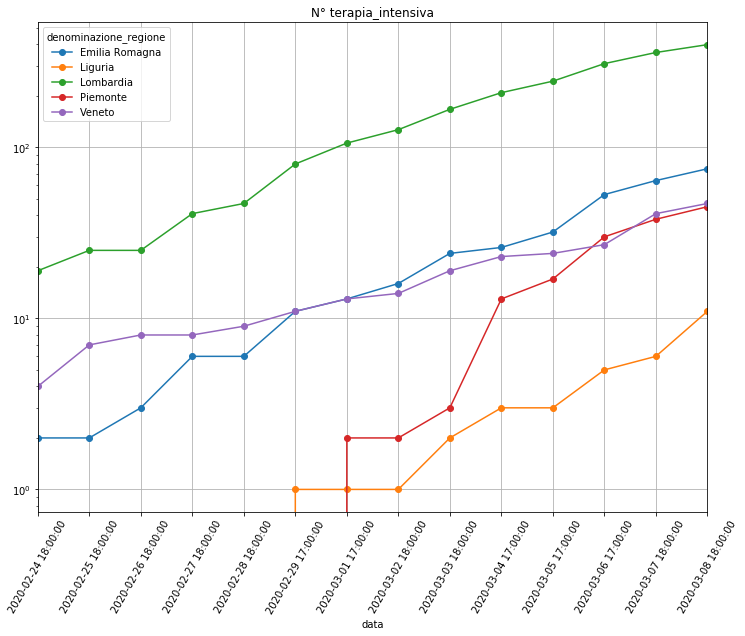

In [41]:
data_topregions_plot = data_topregions.reset_index().pivot('data','denominazione_regione','terapia_intensiva')
data_topregions_plot.plot(title='N° terapia_intensiva', 
                                                            logy=True, grid=True, figsize=(12,9), style='o-', rot=60)
plt.xticks(range(len(data_topregions_plot.index)), data_topregions_plot.index)

([<matplotlib.axis.XTick at 0x121bbde50>,
 <a list of 14 Text xticklabel objects>)

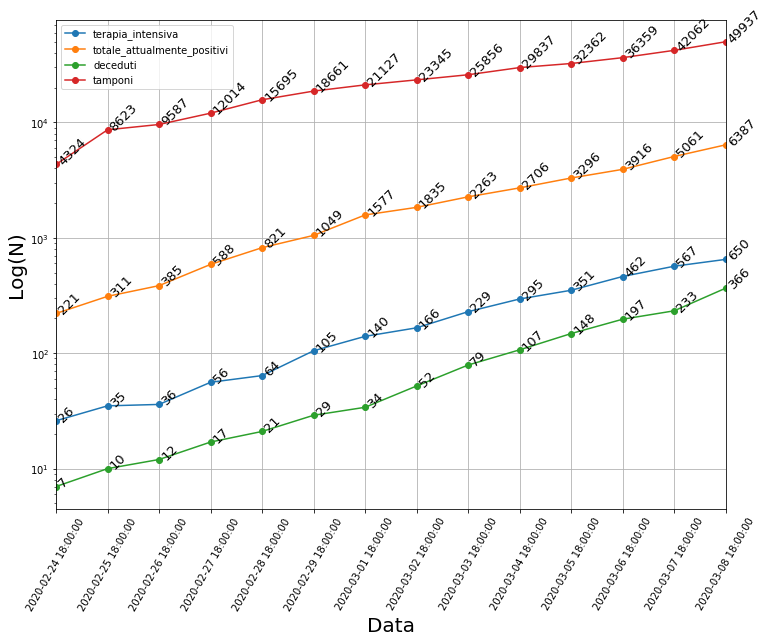

In [4]:
ax = data_Italy[['terapia_intensiva','totale_attualmente_positivi','deceduti','tamponi']].plot(
     figsize=(12,9), logy=True, style='o-', grid=True, rot=60)
ax.set_xlabel("Data", fontsize=20)
ax.set_ylabel("Log(N)", fontsize=20)
for i,v in enumerate(data_Italy['tamponi'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13)

for i,v in enumerate(data_Italy['terapia_intensiva'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13)
    
for i,v in enumerate(data_Italy['totale_attualmente_positivi'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13)
    
for i,v in enumerate(data_Italy['deceduti'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13) 

plt.xticks(range(len(data_Italy.index)), data_Italy.index)

In [9]:
data_Italy_elab = pd.DataFrame(data_Italy)
data_Italy_elab['terapia_intensiva_s1'] = data_Italy_elab['terapia_intensiva'].shift(1)
data_Italy_elab['deceduti_s1'] = data_Italy_elab['deceduti'].shift(1)
data_Italy_elab['terapia_intensiva_ratio'] = data_Italy_elab['terapia_intensiva']/data_Italy_elab['terapia_intensiva_s1']
data_Italy_elab['deceduti_ratio'] =  data_Italy_elab['deceduti']/data_Italy_elab['deceduti_s1']
data_Italy_elab.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,terapia_intensiva_s1,deceduti_s1,terapia_intensiva_ratio,deceduti_ratio
data,,,,,,,,,,,,,,,
2020-03-04 18:00:00,ITA,1346,295,1641,1065,2706,443,276,107,3089,29837,229.0,79.0,1.288210,1.354430
2020-03-05 18:00:00,ITA,1790,351,2141,1155,3296,590,414,148,3858,32362,295.0,107.0,1.189831,1.383178
2020-03-06 18:00:00,ITA,2394,462,2856,1060,3916,620,523,197,4636,36359,351.0,148.0,1.316239,1.331081
2020-03-07 18:00:00,ITA,2651,567,3218,1843,5061,1145,589,233,5883,42062,462.0,197.0,1.227273,1.182741
2020-03-08 18:00:00,ITA,3557,650,4207,2180,6387,1326,622,366,7375,49937,567.0,233.0,1.146384,1.570815


([<matplotlib.axis.XTick at 0x124bfc8d0>,
 <a list of 14 Text xticklabel objects>)

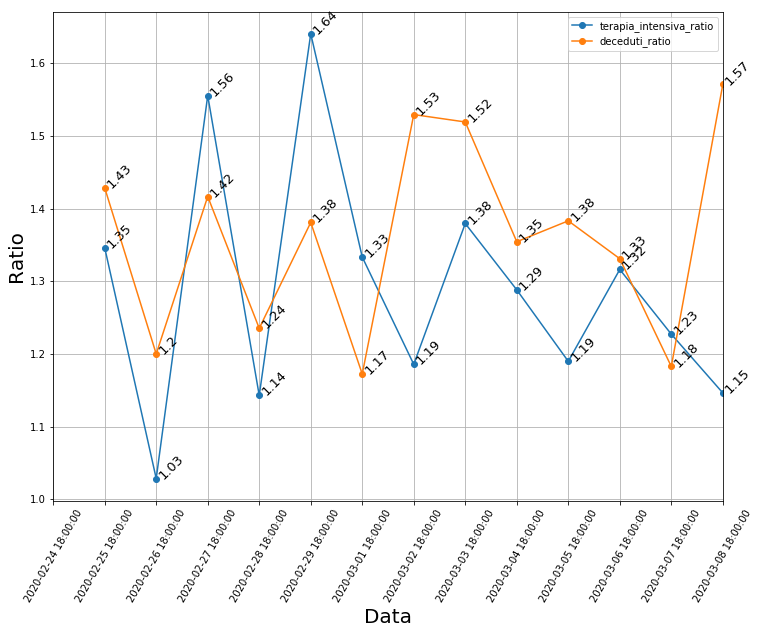

In [14]:
ax = data_Italy[['terapia_intensiva_ratio','deceduti_ratio']].plot(
     figsize=(12,9), style='o-', grid=True, rot=60)
ax.set_xlabel("Data", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)

for i,v in enumerate(data_Italy['terapia_intensiva_ratio'].values):
    ax.annotate(str(round(v,2)),(i,v), rotation = 45, fontsize=13)
    
for i,v in enumerate(data_Italy['deceduti_ratio'].values):
    ax.annotate(str(round(v,2)),(i,v), rotation = 45, fontsize=13) 

plt.xticks(range(len(data_Italy.index)), data_Italy.index)

In [17]:
ci_lower_bound(6387,49937)

0.1250004967020948

In [18]:
ci_lower_bound(221,4324)

0.04493538340070332